<head>
    
</head>
<body style="background-color:black">

<h1 style="color:green;">We are the Law Abiding IRS Employees against COVID-19. This is our final project for Big Ideas in Computing and Information.</h1>

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<h2>We chose to analyze the city of Pittsburgh by the metric of safety. To tackle this metric, we analyzed these submetrics:</h2>
</div>

<div style="border: 2px solid black;color:green;"><h1><b>The first submetric we analyzed regarded police arrests.</b></h1></div>

In [103]:
import pandas as pd

df = pd.read_csv("crimerecords.tsv", sep="\t")

cit_count = df['INCIDENTNEIGHBORHOOD'].count()
common_count = df['INCIDENTNEIGHBORHOOD'].value_counts()
mostcommon = common_count.idxmax()

print(common_count)
print(mostcommon)

INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
                             ... 
Regent Square                  37
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: count, Length: 98, dtype: int64
Central Business District


In [32]:
cit_count = df['INCIDENTNEIGHBORHOOD'].count()
common_count = df['INCIDENTNEIGHBORHOOD'].value_counts()
mostcommon = common_count.idxmax()

print(common_count)
print(mostcommon)

INCIDENTNEIGHBORHOOD
Central Business District    4440
South Side Flats             3497
Carrick                      2352
East Allegheny               2217
Homewood South               2090
                             ... 
Regent Square                  37
Central Northside              23
Mt. Oliver Boro                18
Troy Hill-Herrs Island          6
Mt. Oliver Neighborhood         2
Name: count, Length: 98, dtype: int64
Central Business District


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>With the data provided, we see that Central Business District is a no go. They have the most amount of crime in record. However, Mt. Oliver Neighborhood might have the lowest, but their population is at a low of 3,394. If we compare that to Squirrel Hill South, their population is over 14,500. These results are currently inconclusive. I think creating a bar graph would help visualize these numbers better.</span>
</div>

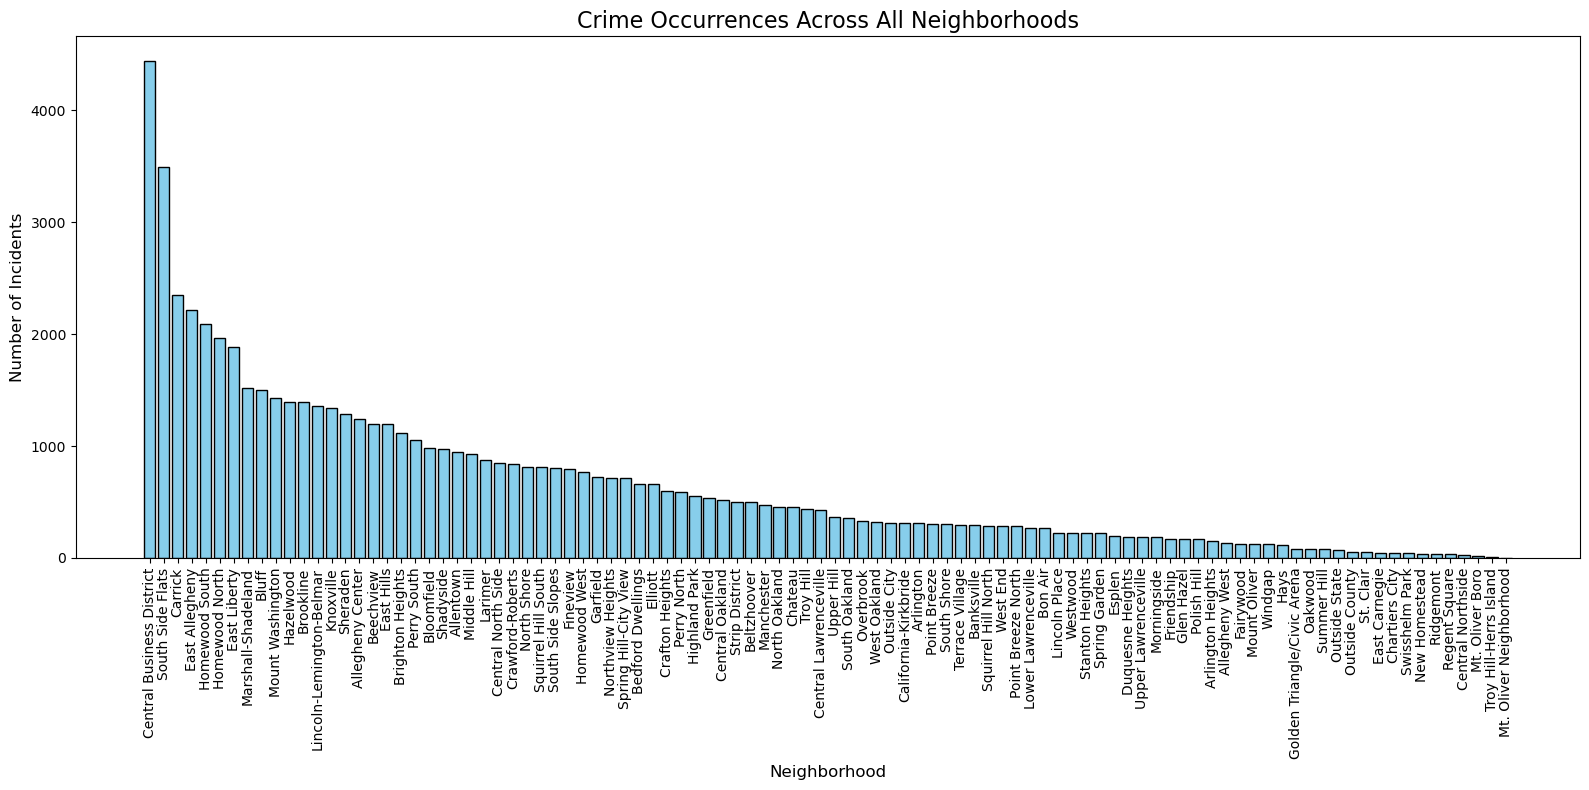

In [26]:
import matplotlib.pyplot as plt

neighborhood_counts = df['INCIDENTNEIGHBORHOOD'].value_counts()

plt.figure(figsize=(16, 8))
plt.bar(neighborhood_counts.index, neighborhood_counts.values, color='skyblue', edgecolor='black')
plt.title("Crime Occurrences Across All Neighborhoods", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Number of Incidents", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

plt.show()

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
Using this bar graph, we see that the most amount was Central Business District, but how does that compare with Squirrel Hill South or Mt. Oliver Neighborhood?

In [ ]:
neighborhood_name = 'Squirrel Hill South'
neighborhood_crimes = df[df['INCIDENTNEIGHBORHOOD'].str.lower() == neighborhood_name.lower()]
most_common_offense = neighborhood_crimes['OFFENSES'].value_counts().idxmax()
most_common_count = neighborhood_crimes['OFFENSES'].value_counts().max()

print(f"The most common offense in {neighborhood_name} is '{most_common_offense}' with {most_common_count} occurrence(s).")

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
The most common offense in Squirrel Hill South is '2701 Simple Assault.' with 43 occurrence(s).

In [63]:
neighborhood_name = 'Mt. Oliver Neighborhood'
neighborhood_crimes = df[df['INCIDENTNEIGHBORHOOD'].str.lower() == neighborhood_name.lower()]
most_common_offense = neighborhood_crimes['OFFENSES'].value_counts().idxmax()
most_common_count = neighborhood_crimes['OFFENSES'].value_counts().max()

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
The most common offense in Mt. Oliver Neighborhood is '4906 False Reports to Law Enforcement Authorities.' with 1 occurrence(s).
We see the data that Squirrel Hill South has the Assault as the most, with a number of 43 occurences. Mt. Oliver Neighborhood only have one occurence, and that is False Reports to Law Enforcement Authoritites.

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
We see that the most amount of crime committed is Assault, which is considered "common" for crime in neighborhood. We see that False Reports to Law Enforcement Authorities isn't as common, so considered pretty rare.

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
The main conclusions we can draw from this data are that the Central Business District and Southside Flats are disqualified, soaring above all the other neighborhoods in this metric. Beyond that, there are a few other relatively high crime neighborhoods like Carrick and East Allegheny, but most neighorhoods fall within a similar range of low crime. There are some neighborhoods with almost no reported crime, and this is likely because those neighborhoods have extremely low populations.

<hr>

<div style="border: 2px solid black;color:green;"><h1><b>The next submetric we analyzed regarded tax delinquency</b></h1></div>

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>First I created the database delq, so that I could manipulate the data with PANDAS</span>

In [38]:
delq = pd.read_csv("TaxDelinquencies.tsv", sep="\t", engine="python")
delq.head()

,_id,pin,address,billing_city,current_delq_tax,current_delq_pi,prior_years,prior_delq_tax,prior_delq_pi,state_description,neighborhood,council_district,ward,public_works_division,pli_division,police_zone,fire_zone,longitude,latitude
0,662410,0001C01661A05700,320 FORT DUQUESNE BLVD STE 120,"PITTSBURGH, PA",1658.22,0,0,0.0,0.0,Commercial,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.006743,40.442090
1,662411,0001C01662006100,320 FORT DUQUESNE BLVD UNIT 6-A,"PITTSBURGH, PA",1283.20,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007243,40.442481
2,662412,0001C01662006800,320 FORT DUQUESNE BLVD UNIT 6-H,"WALNUT CREEK, CA",2660.78,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007158,40.442292
3,662413,0001C01662015300,320 FORT DUQUESNE BLVD UNIT 15-C,"PITTSBURGH, PA",4481.02,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007125,40.442449
4,662414,0001C01662015400,320 FORT DUQUESNE BLVD UNIT 15-D,"PITTSBURGH, PA",3550.89,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007113,40.442422


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<h3>Here I filtered out all the instances of tax delinquencies from Pittsburgh's suburbs, by only showing entries in Pittsburgh</h3>

In [45]:
count_the_burgh = delq[delq['billing_city'].str.contains('Pittsburgh', case=False, na=False)]
count_the_burgh.head()

,_id,pin,address,billing_city,current_delq_tax,current_delq_pi,prior_years,prior_delq_tax,prior_delq_pi,state_description,neighborhood,council_district,ward,public_works_division,pli_division,police_zone,fire_zone,longitude,latitude
0,662410,0001C01661A05700,320 FORT DUQUESNE BLVD STE 120,"PITTSBURGH, PA",1658.22,0,0,0.0,0.0,Commercial,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.006743,40.442090
1,662411,0001C01662006100,320 FORT DUQUESNE BLVD UNIT 6-A,"PITTSBURGH, PA",1283.20,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007243,40.442481
3,662413,0001C01662015300,320 FORT DUQUESNE BLVD UNIT 15-C,"PITTSBURGH, PA",4481.02,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007125,40.442449
4,662414,0001C01662015400,320 FORT DUQUESNE BLVD UNIT 15-D,"PITTSBURGH, PA",3550.89,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007113,40.442422
5,662415,0001C01662022800,320 FORT DUQUESNE BLVD UNIT 22-H,"PITTSBURGH, PA",2616.95,0,0,0.0,0.0,Residential,Central Business District,1.0,2.0,1.0,2.0,2.0,1-3,-80.007023,40.442443


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>Next I used PANDAS to count each unique value and categorize each of these instances by neighborhood</span>

In [51]:
neighborhood_instances = delq['neighborhood'].value_counts()
neighborhood_list = list(neighborhood_instances.items())
for neighborhood, count in neighborhood_list:
    print(f"{neighborhood},\n{count}")

Lincoln-Lemington-Belmar,
1116
Homewood North,
1034
Perry South,
875
Marshall-Shadeland,
858
Carrick,
788
East Hills,
700
Hazelwood,
692
Knoxville,
653
Beltzhoover,
652
Beechview,
644
Mount Washington,
633
Brookline,
618
Sheraden,
611
Homewood South,
570
Middle Hill,
535
South Side Slopes,
494
Brighton Heights,
461
Garfield,
442
South Side Flats,
441
Bloomfield,
431
Shadyside,
416
Upper Hill,
400
Perry North,
393
Squirrel Hill South,
390
Greenfield,
385
Elliott,
382
Spring Hill-City View,
371
Allentown,
365
Stanton Heights,
327
Larimer,
327
Manchester,
314
Mount Oliver Borough,
313
Central Lawrenceville,
298
Highland Park,
296
Arlington,
291
Overbrook,
289
Squirrel Hill North,
274
Central Northside,
271
Crafton Heights,
267
East Liberty,
256
Crawford-Roberts,
252
Upper Lawrenceville,
241
Lincoln Place,
239
East Allegheny,
231
Lower Lawrenceville,
209
Troy Hill,
206
Point Breeze,
204
New Homestead,
196
Spring Garden,
189
Fineview,
181
Duquesne Heights,
179
Central Business District,
175

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<h3>This shows all of the neighborhoods which are found within the datasheet. However, there are other neighborhoods which are not found within the data sheet, and those are the cleared criteria who are now proper candidates for the title of "best neighborhood in Pittsburgh"</h3>
</div><br>

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>First I copied a list of every Pittsburgh neighborhood from Wikipedia, and then created a value containing every word</span>
</div>

In [57]:
all_neighborhoods=('Allegheny Center','Allegheny West','Allentown','Arlington','Arlington Heights','Banksville','Bedford Dwellings','Beechview','Beltzhoover','Bloomfield','Bluff','Bon Air','Brighton Heights','Brookline','California-Kirkbride','Carrick','Central Business District','Cultural District','Central Lawrenceville','Central Northside','Mexican War Streets','Central Oakland','Chartiers','Chateau','Crafton Heights','Crawford-Roberts','Duquesne Heights','East Allegheny','East Carnegie','East Hills','East Liberty','Elliott','Esplen','Fairywood','Fineview','Friendship','Garfield','The Valley','Hilltop','Glen Hazel','Greenfield','Four Mile Run','Hays','Hazelwood','Highland Park','Homewood North','Homewood South','Homewood West','Knoxville','Larimer','Lincoln–Lemington–Belmar','Lincoln Place','Lower Lawrenceville','Manchester','Marshall-Shadeland','Brunot Island','Middle Hill','Morningside','Mount Oliver','Mount Washington','Chatham Village','New Homestead','North Oakland','North Point Breeze','North Shore','Northview Heights','Oakwood','Overbrook','Perry North','Perry South','Point Breeze','Park Place','Polish Hill','Regent Square','Ridgemont','Saint Clair','Shadyside','Sheraden','South Oakland','Panther Hollow','South Shore','Station Square','South Side Flats','SouthSide Works','South Side Slopes','Spring Garden','Spring Hill–City View','Squirrel Hill','Summerset','Stanton Heights','Strip District','Summer Hill','Swisshelm Park','Duck Hollow','Terrace Village','Troy Hill',"Washington's Landing",'Upper Hill','Upper Lawrenceville','West End','West Oakland','Westwood','Windgap')
represented_neighborhoods=('Lincoln-Lemington-Belmar','Homewood North','Perry South','Marshall-Shadeland','Carrick','East Hills','Hazelwood','Knoxville','Beltzhoover','Beechview','Mount Washington','Brookline','Sheraden','Homewood South','Middle Hill','South Side Slopes','Brighton Heights','Garfield','South Side Flats','Bloomfield','Shadyside','Upper Hill','Perry North','Squirrel Hill South','Greenfield','Elliott','Spring Hill-City View','Allentown','Stanton Heights','Larimer','Manchester','Mount Oliver Borough','Central Lawrenceville','Highland Park','Arlington','Overbrook','Squirrel Hill North','Central Northside','Crafton Heights','East Liberty','Crawford-Roberts','Upper Lawrenceville','Lincoln Place','East Allegheny','Lower Lawrenceville','Troy Hill','Point Breeze','New Homestead','Spring Garden','Fineview','Duquesne Heights','Central Business District','Homewood West','South Oakland','Westwood','Morningside','Polish Hill','California-Kirkbride','Esplen','Strip District','Point Breeze North','Banksville','West Oakland','Windgap','North Oakland','Central Oakland','Hays','Summer Hill','Mt. Oliver','Chartiers City','Bluff','West End','Bedford Dwellings','Bon Air','Swisshelm Park','St. Clair','Oakwood','Fairywood','Friendship','Terrace Village','Ridgemont','Allegheny West','Regent Square','East Carnegie','Northview Heights','North Shore','South Shore','Chateau','Glen Hazel','Arlington Heights','Squirrel Hill','Allegheny Center','Crawford Roberts')
unrepresented_neighborhoods=set(all_neighborhoods).symmetric_difference(set(represented_neighborhoods))
result=tuple(unrepresented_neighborhoods)
for neighborhood in result:
    print(f"{neighborhood}")

Panther Hollow
Saint Clair
SouthSide Works
Point Breeze North
St. Clair
The Valley
Summerset
Cultural District
Four Mile Run
Chatham Village
Mexican War Streets
North Point Breeze
Spring Hill-City View
Mount Oliver Borough
Park Place
Lincoln-Lemington-Belmar
Spring Hill–City View
Hilltop
Chartiers City
Mt. Oliver
Washington's Landing
Brunot Island
Squirrel Hill South
Chartiers
Lincoln–Lemington–Belmar
Station Square
Squirrel Hill North
Mount Oliver
Duck Hollow
Crawford Roberts


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span style="font-size:large;"><i>Here we have narrowed down the neighborhoods in Pittsburgh to only those which had no instances of tax delinquincy in 2017!</i></span>
</div>

In [15]:
print(geopan.columns)

Index(['name', 'created_at', 'updated_at', 'cartodb_id', 'geometry'], dtype='object')


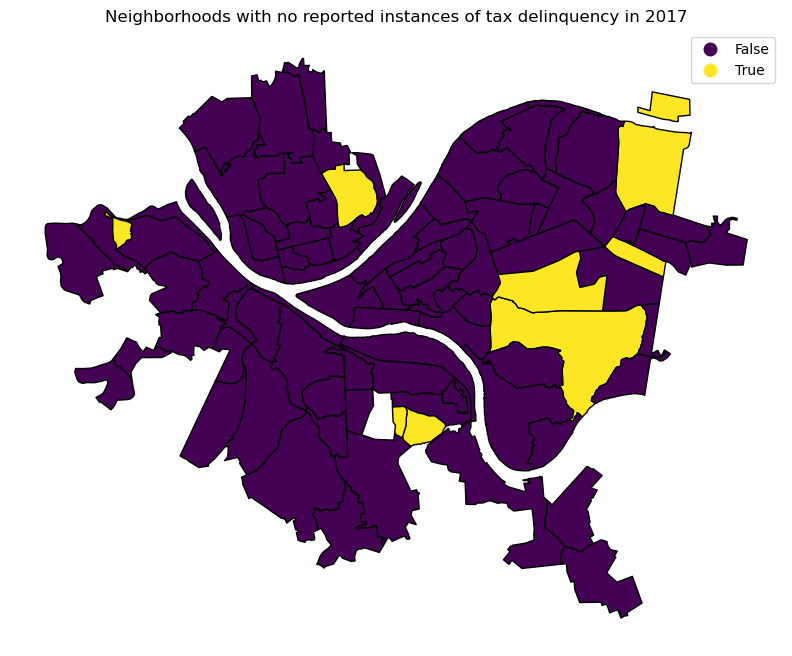

In [6]:
import geopandas as gpd
import matplotlib.pyplot as plt

geojson_map = "pittsburgh_neighborhoods.geojson"
geopan = gpd.read_file(geojson_map)

highlighted_neighborhoods = [
'Panther Hollow',
'Saint Clair',
'SouthSide Works',
"Point Breeze North",
"St. Clair",
"The Valley",
"Summerset",
"Cultural District",
"Four Mile Run",
"Chatham Village",
"Mexican War Streets",
"North Point Breeze",
"Spring Hill-City View",
"Mount Oliver Borough",
"Park Place",
"Lincoln-Lemington-Belmar",
"Spring Hill–City View",
"Hilltop",
"Chartiers City",
"Mt. Oliver",
"Washington's Landing",
"Brunot Island",
"Squirrel Hill South",
"Chartiers",
"Lincoln–Lemington–Belmar",
"Station Square",
"Squirrel Hill North",
"Mount Oliver",
"Duck Hollow",
"Crawford Roberts",
]

geopan["highlight"] = geopan["name"].isin(highlighted_neighborhoods)

fig, ax = plt.subplots(1,1, figsize=(12,8))
geopan.plot(
    ax=ax,
    column="highlight",
    cmap="viridis",
    legend=True,
    edgecolor="black",
)
ax.set_title("Neighborhoods with no reported instances of tax delinquency in 2017")
plt.axis("off")
plt.show()

<hr>

<div style="border: 2px solid black;color:green;"><h1><b>The last submetric we studied regarded COVID-19 vaccinations</b></h1></div>

In [194]:
df = pd.read_csv("covidvaccination.tsv", sep="\t")

cit_count = df['neighborhood_municipality'].count()
pt_df = df[df['neighborhood_municipality'].str.contains('Pittsburgh', case=False)].copy()  # Make a copy to avoid the warning
pt_df['neighborhood_municipality'] = pt_df['neighborhood_municipality'].str.replace(
    r"\(.*?\)", "", regex=True
).str.strip()
pt_count = pt_df['neighborhood_municipality'].count()

print(pt_df)

       _id neighborhood_municipality  bivalent_booster
0    25477            Chartiers City                90
4    25481              East Liberty              1207
5    25482                   Carrick              1405
6    25483              Point Breeze              2458
7    25484             Lincoln Place               534
..     ...                       ...               ...
206  25683                  Sheraden               687
207  25684                 Brookline              2606
214  25691                     Bluff               186
215  25692                   Elliott               306
219  25696           Central Oakland               405

[92 rows x 3 columns]


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>There are 221 subdivisions in this data, but 92 of these subdivisions are neighborhoods of Pittsburgh.</span>
</div>

In [198]:
pt_df = df[df['neighborhood_municipality'].str.contains('Pittsburgh', case=False)]
vacc_df = pt_df['bivalent_booster']

<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>There are a total of 61718 people vaccinated in all 92 neighborhoods in the city of Pittsburgh. That's an average of 671 people vaccinated per neighborhood.</span>
</div>

In [204]:
pt_df = df[df['neighborhood_municipality'].str.contains('Pittsburgh', case=False)]

vacc_df = pt_df['bivalent_booster']

max_row = vacc_df.idxmax()

print(pt_df.loc[max_row])

_id                                                     25579
neighborhood_municipality    Squirrel Hill South (Pittsburgh)
bivalent_booster                                         5347
Name: 102, dtype: object


<div style="background-color:yellow;padding:2px;border: 1px solid black;">
<span>The neighborhood with the highest record of vaccinations is Squirrel Hill South, with a number of 5347 vaccinations! That's ~58 times more than the average!</span>
</div>

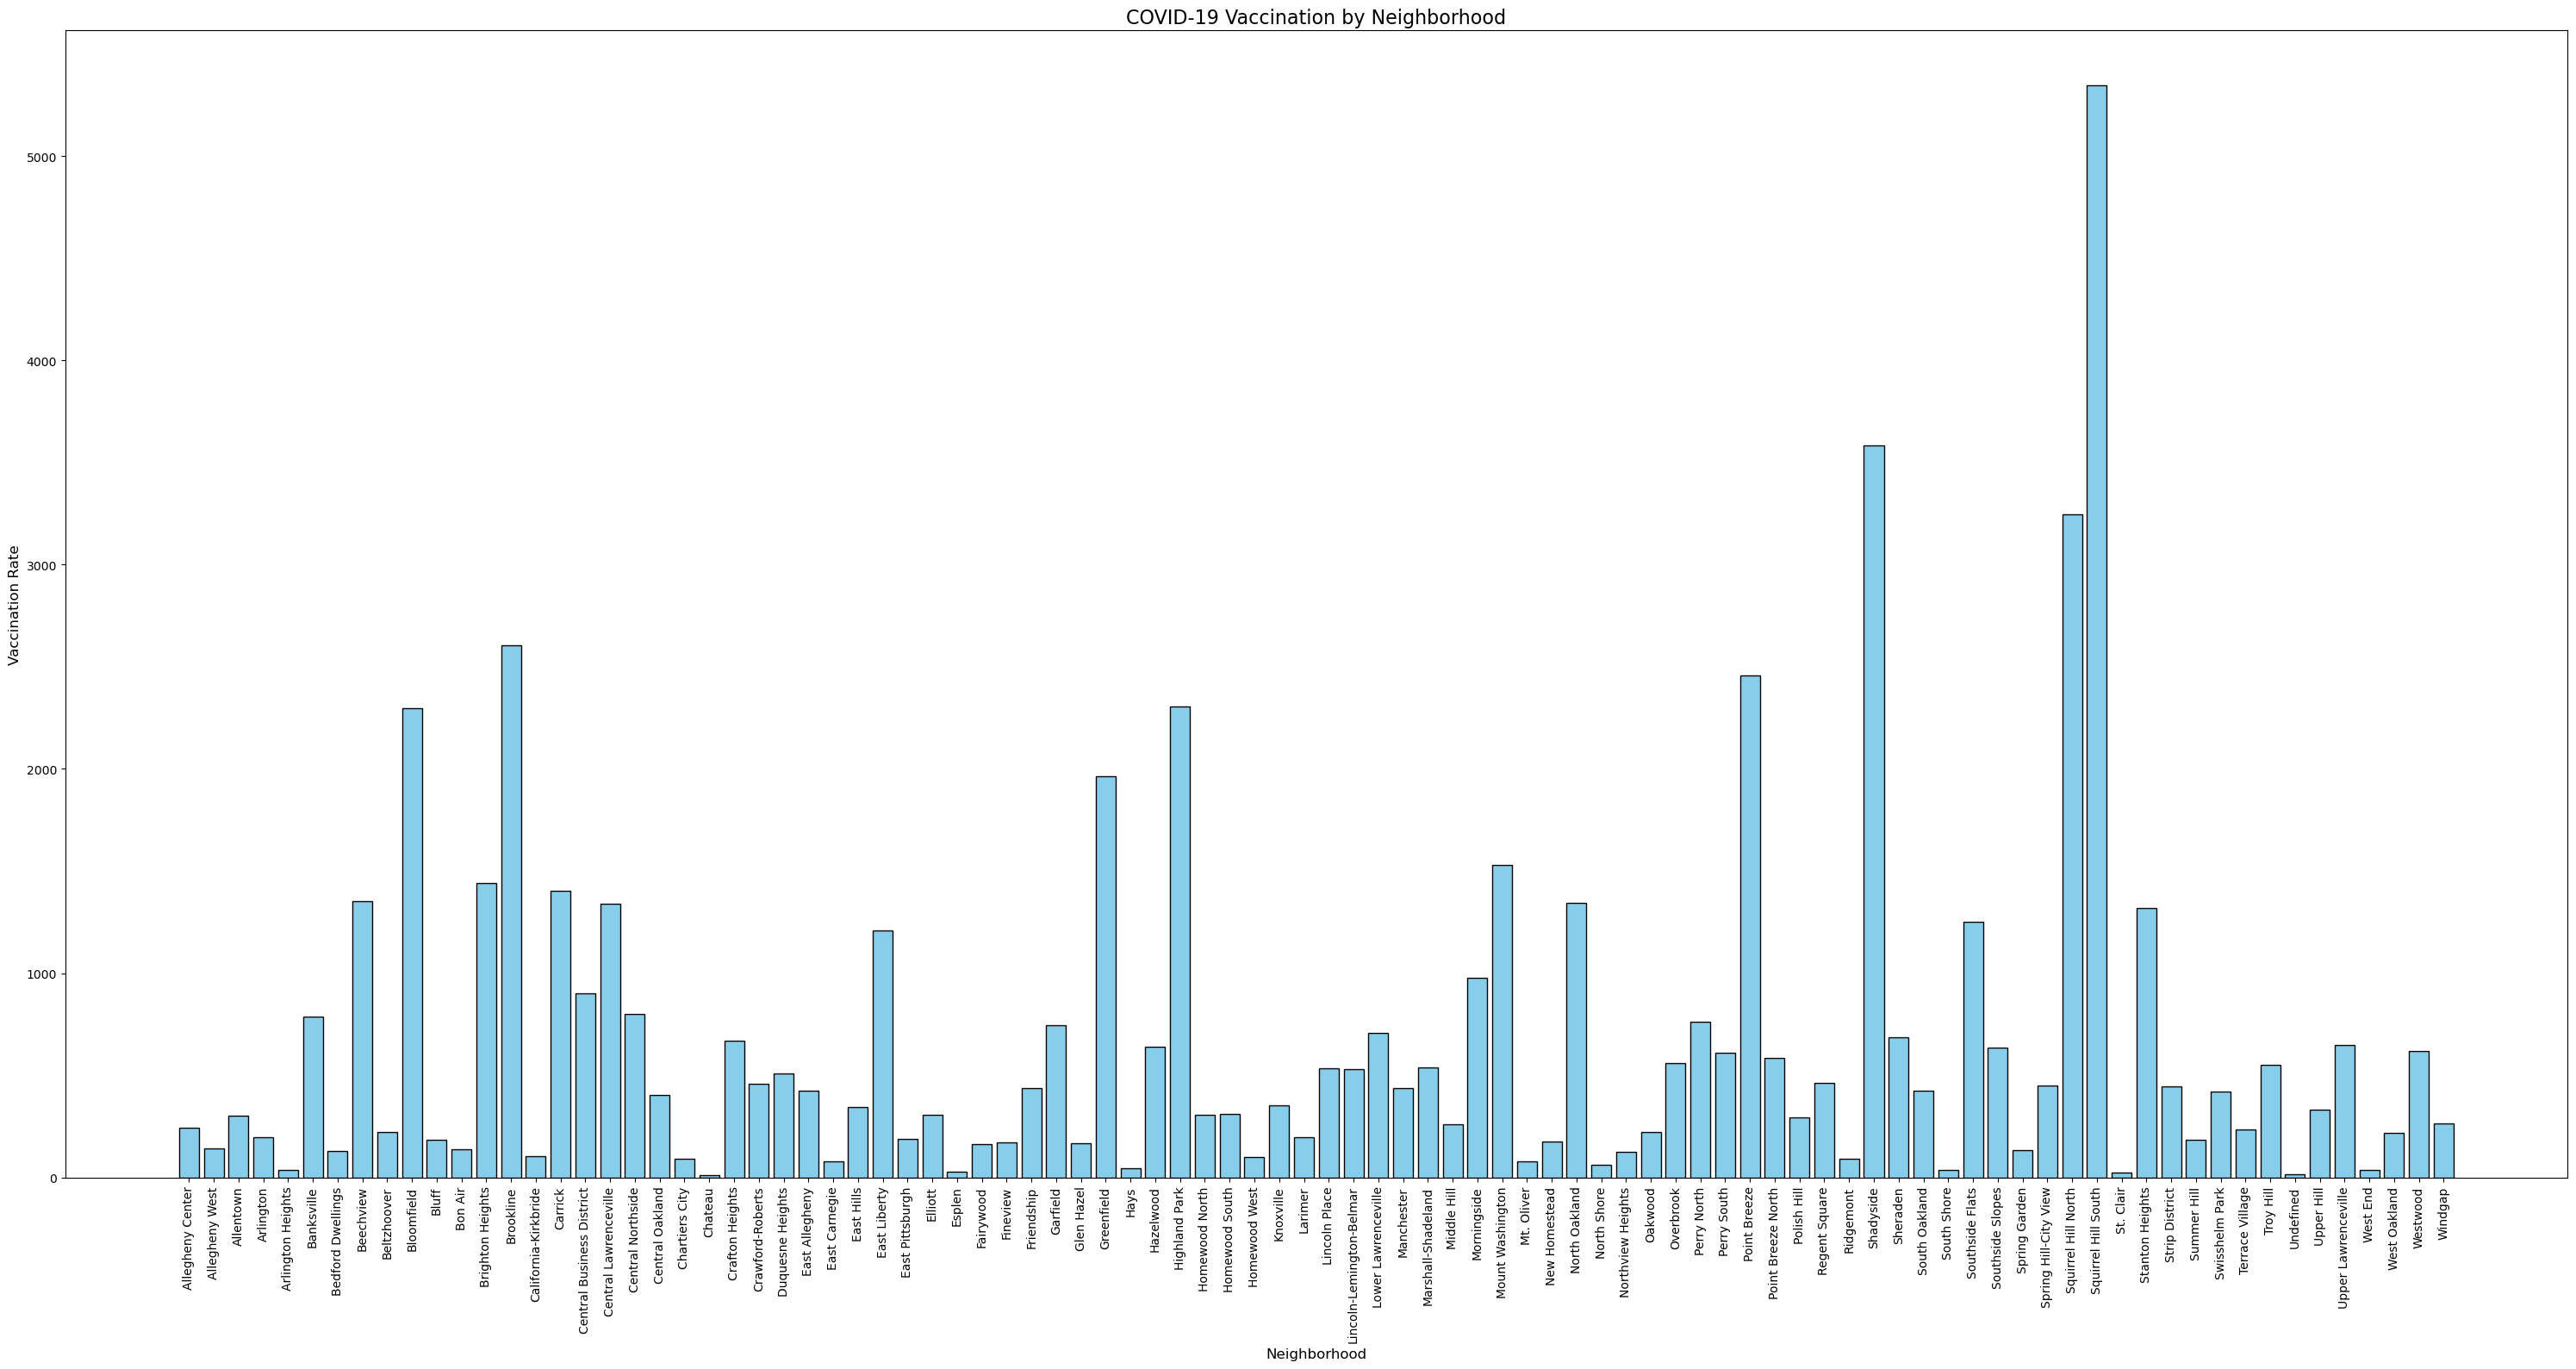

In [186]:
neighborhood_vaccination_rate = pt_df.groupby('neighborhood_municipality')['bivalent_booster'].mean()

plt.figure(figsize=(30, 16))
plt.bar(
    neighborhood_vaccination_rate.index,
    neighborhood_vaccination_rate.values,
    color='skyblue',
    edgecolor='black',
)
plt.title("COVID-19 Vaccination by Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Vaccination Rate", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

plt.show()

<h1 style="color:green">Conclusion</h1>

<div style="background-color:pink;padding:2px;border: 1px solid black;">
In conclusion, Squirrell Hill South is the best neighborhood in Pittsburgh. It had no instances of tax delinquency in 2017, it has the highest vaccination rate, and it was on the lower side of crime. We can visualize this by combining the previous bar graphs, while excluding the cities which did not pass the tax deliquency test:

In [231]:
highlighted_neighborhoods=[
'Panther Hollow (Pittsburgh)',
'Saint Clair (Pittsburgh)',
'SouthSide Works (Pittsburgh)',
"Point Breeze North (Pittsburgh)",
"St. Clair (Pittsburgh)",
"The Valley (Pittsburgh)",
"Summerset (Pittsburgh)",
"Cultural District (Pittsburgh)",
"Four Mile Run (Pittsburgh)",
"Chatham Village (Pittsburgh)",
"Mexican War Streets (Pittsburgh)",
"North Point Breeze (Pittsburgh)",
"Spring Hill-City View (Pittsburgh)",
"Mount Oliver Borough (Pittsburgh)",
"Park Place (Pittsburgh)",
"Lincoln-Lemington-Belmar (Pittsburgh)",
"Spring Hill–City View (Pittsburgh)",
"Hilltop (Pittsburgh)",
"Chartiers City (Pittsburgh)",
"Mt. Oliver (Pittsburgh)",
"Washington's Landing (Pittsburgh)",
"Brunot Island (Pittsburgh)",
"Squirrel Hill South (Pittsburgh)",
"Chartiers (Pittsburgh)",
"Lincoln–Lemington–Belmar (Pittsburgh)",
"Station Square (Pittsburgh)",
"Squirrel Hill North (Pittsburgh)",
"Mount Oliver (Pittsburgh)",
"Duck Hollow (Pittsburgh)",
"Crawford Roberts (Pittsburgh)",
]

highlighted_df = df[df['neighborhood_municipality'].isin(highlighted_neighborhoods)]
highlighted_df = df.groupby('neighborhood_municipality')['bivalent_booster'].mean()
highlighted_df = highlighted_df[highlighted_df.index.isin(highlighted_neighborhoods)]

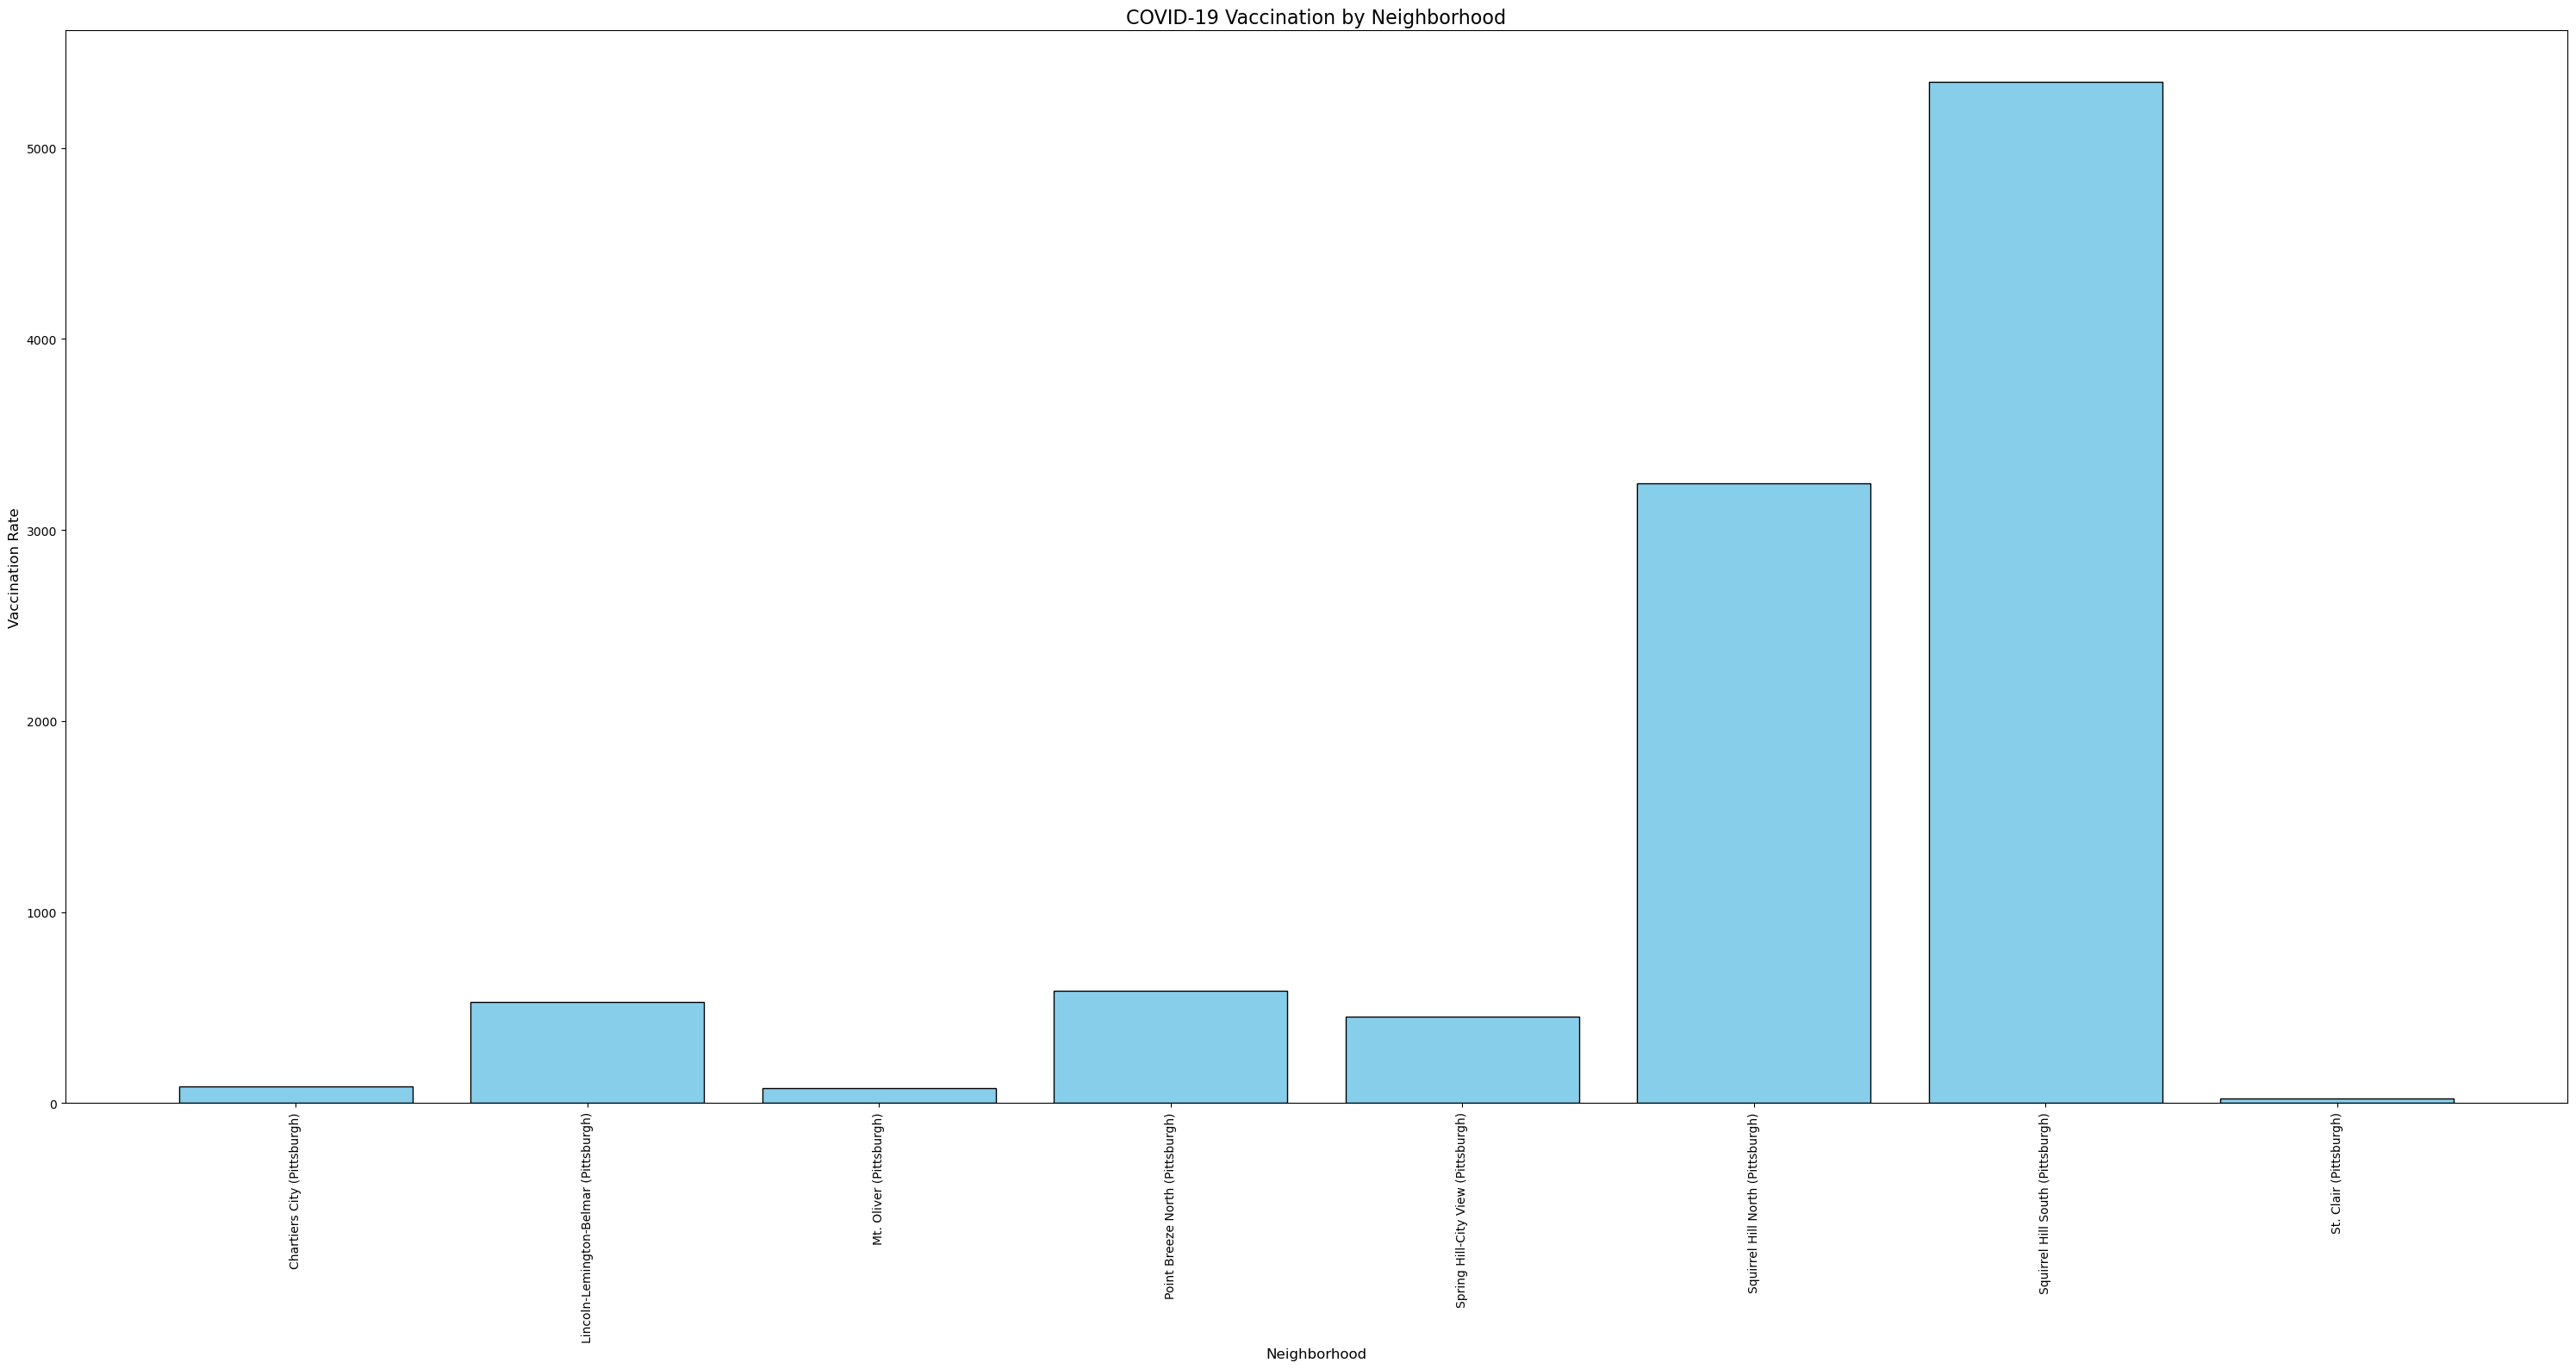

In [235]:
plt.figure(figsize=(30, 16))
plt.bar(
    highlighted_df.index,
    highlighted_df.values, 
    color='skyblue',
    edgecolor='black',
)
plt.title("COVID-19 Vaccination by Neighborhood", fontsize=16)
plt.xlabel("Neighborhood", fontsize=12)
plt.ylabel("Vaccination Rate", fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.tight_layout()

plt.show()

<div style="background-color:pink;padding:2px;border: 1px solid black;">This graph, now that we have excluded neighborhoods that had recorded instances of tax delinquencies, shows why Squirrel Hill South is the best neighborhood, as the only neighborhoods which challenged them in this regard had instances of tax delinquency recorded in the data.

<h1 style="color:green">Reflection</h1>

<div style="background-color:cyan;padding:2px;border: 1px solid black;">Jason - <i>This wasn't a surprise to us, as Squirrel Hill is one of the more yuppy and educated neighborhoods of Pittsburgh we figured that it would score high on these metrics. My personal favorite neighborhood is Central Oakland, sicne it's where I live and has lots of great food, but we didn't measure food and the high density of college students probably drove up the crime statistics.</i><br><br>
Kyu - <i>My data-driven determination is different from my personal favorite. My personal favorite was the strip district, but Squirrel Hill South had the safest data possible. Its vaccination rates were through the roof, compared to strip district.</i>

</body>